# Задача
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике


## Рекомендации по выполнению проекта
- Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
- Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- Оцените количество уникальных значений для номинативных переменных.
- По необходимости преобразуйте данные
- Проведите корреляционный анализ количественных переменных
- Отберите не коррелирующие переменные.
- Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import t
import math
%matplotlib inline
sns.set() #установка темы графиков

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df_stud = pd.read_csv('stud_math.csv')
display(df_stud.head(10))
print()
df_stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    ob

In [110]:
# функции
def clean_obj_cell(x):
    '''Замена пустых значений на None'''
    res = x
    if (pd.isnull(x) | (x == 'nan') | (str(x).strip() == '')):
        res = None
    return res

def get_boxplot(df_stud,column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df_stud.loc[df_stud.loc[:, column].isin(df_stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(df_stud,column):
    cols = df_stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    if (len(combinations_all)>1):
        for comb in combinations_all:
            if ttest_ind(df_stud.loc[df_stud.loc[:, column] == comb[0], 'score'], df_stud.loc[df_stud.loc[:, column] == comb[1], 'score']).pvalue <= 0.1/len(combinations_all): # Учли поправку Бонферони
                print('Найдены статистически значимые различия для колонки', column)
                break

# Анализ

Score - это целевой параметр - успеваемость. Возможно в нем есть ошибки в виде не заполненных данных, их нужно отсечь. На статистику о зависимост от условий жизни должно накладываться распределение по склонности к изучению математике (предположительно нормально-распределенное). Однако возможно, что для этого данных не достаточно.  

пока почистим данные и посмотрим на них, заполнять пустые не будем, так как для этого нужно учитывать связи

Исходную таблицу изменять не будем. Итоговый датасет сформируем в переменной df_stud_new


## 1. Школа
- Заполнен полностью, 395==395. 
- Есть только две школы, в одной школе выборка больше чем в другой.
- Возможно этот столбец вообще лишний, но пока оставим его. Так как разные школы могут учить по разному и это может повлиять на результат.

In [111]:
df_stud.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,46.000000,46.000000,44.000000,42.000000,46.000000,46.000000,46.000000,42.000000,46.000000,46.000000,46.000000,45.000000,45.000000
mean,18.021739,2.347826,2.250000,1.928571,1.826087,0.456522,-5.478261,3.857143,3.326087,3.086957,3.391304,8.155556,49.444444
std,0.881643,1.215043,1.123222,0.777515,0.708813,0.808470,2.126438,1.049307,1.096547,1.050420,1.452634,31.353523,21.379212
min,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,17.250000,1.000000,1.000000,1.000000,1.000000,0.000000,-6.000000,3.000000,3.000000,2.000000,2.250000,0.000000,40.000000
50%,18.000000,2.000000,2.000000,2.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,3.000000,3.000000,50.000000
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,4.000000,65.000000
max,21.000000,4.000000,4.000000,4.000000,3.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,212.000000,95.000000


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,349.00000,346.000000,327.000000,325.000000,342.000000,327.000000,342.000000,326.000000,338.000000,341.000000,334.000000,338.000000,344.000000
mean,16.52149,2.803468,2.663609,1.375385,2.067251,0.321101,-6.201754,3.947853,3.218935,3.108504,3.550898,7.162722,52.630814
std,1.21661,1.072226,2.334719,0.657819,0.855298,0.733268,2.565893,0.911657,0.980218,1.125879,1.389185,22.263731,23.116772
min,15.00000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.00000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,16.00000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,17.00000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.00000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


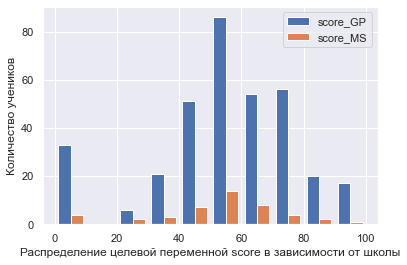

In [112]:
df_stud_ms = df_stud[df_stud.school == 'MS']
df_stud_gp = df_stud[df_stud.school == 'GP']
display(df_stud_ms.describe())
display(df_stud_gp.describe())


# Построим гистограмму
df = pd.DataFrame({'score_GP':df_stud_gp.score,'score_MS':df_stud_ms.score})
# df.plot(kind="hist", title='Оценки по школам', bins=20)
plt.hist([list(df.score_GP), list(df.score_MS)], label=['score_GP', 'score_MS'])
plt.xlabel('Распределение целевой переменной score в зависимости от школы')
plt.ylabel('Количество учеников')
plt.legend(loc=1)
plt.show()


In [113]:
# Из таблиц видно, что от выбора школы другие показатели практически не зависят
# Предположим, что обе школы городские, тогда из R добираться дольше

# странно, но при выборе школы, по расстоянию от дома,  школьник очень долго добирается. 
# Дольше, чем те, кто не ставил в приоритет расположение. Возможно, что у него нет транспорта и он идет пешком, либо это ошибка данных

df_stud_ms[(df_stud_ms.address == 'R') & (df_stud_ms.reason == 'home') ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
353,MS,M,19,R,GT3,T,1.0,1.0,other,other,home,other,3.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,5.0,4.0,40.0
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,home,mother,4.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
384,MS,M,18,R,GT3,T,4.0,2.0,other,NaN,home,father,NaN,1.0,1.0,no,no,NaN,no,yes,-3.0,yes,NaN,no,5.0,4.0,3.0,3.0,14.0,25.0


In [114]:
df_stud_gp[(df_stud_gp.address == 'R') & (df_stud_gp.reason == 'home') ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,4.0,1.0,yes,yes,yes,yes,yes,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
197,GP,M,16,R,LE3,NaN,3.0,3.0,teacher,other,home,father,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,no,3.0,3.0,4.0,3.0,8.0,50.0
273,GP,M,17,R,GT3,T,1.0,2.0,at_home,at_home,home,mother,1.0,2.0,0.0,no,yes,yes,yes,no,-6.0,yes,NaN,yes,3.0,5.0,2.0,1.0,2.0,70.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
336,GP,F,19,R,GT3,A,3.0,1.0,services,NaN,home,other,1.0,3.0,1.0,no,no,yes,no,NaN,-9.0,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0
339,GP,F,17,R,GT3,A,3.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,2.0,4.0,50.0


Процент выбора школы GP по близость к дому: 0.2693409742120344
Процент выбора школы MS по близость к дому: 0.21739130434782608
Процент выбора школы GP по репутации: 0.2808022922636103
Процент выбора школы MS по репутации: 0.10869565217391304
Процент выбора школы GP по программе: 0.34097421203438394
Процент выбора школы MS по программе: 0.391304347826087
Процент выбора школы GP по другое: 0.07163323782234957
Процент выбора школы MS по другое: 0.21739130434782608


<ipython-input-115-11116ba01834>:31: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1[0].pie(sizes, explode=(0,0,0,0), labels=labels, autopct='%1.1f%%',
<ipython-input-115-11116ba01834>:35: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1[1].pie(sizes2, labels=labels, autopct='%1.1f%%',


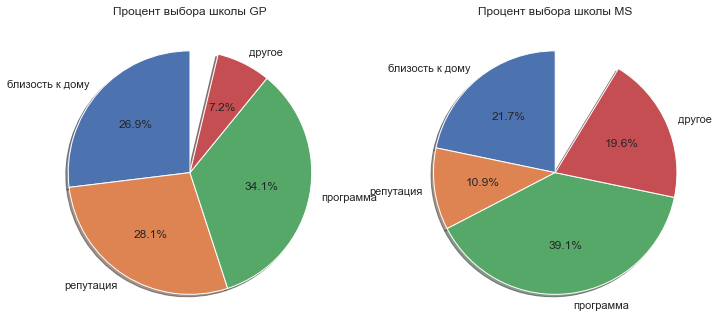

In [115]:
# Исследуем школы и причины выбора этих школ. Возможно, что одна из них лучше другой.
# ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

gp_h = len(df_stud_gp[df_stud_gp.reason == 'home'])/len(df_stud_gp)
ms_h = len(df_stud_ms[df_stud_ms.reason == 'home'])/len(df_stud_ms)
gp_r = len(df_stud_gp[df_stud_gp.reason == 'reputation'])/len(df_stud_gp)
ms_r = len(df_stud_ms[df_stud_ms.reason == 'reputation'])/len(df_stud_ms)
gp_c = len(df_stud_gp[df_stud_gp.reason == 'course'])/len(df_stud_gp)
ms_c = len(df_stud_ms[df_stud_ms.reason == 'course'])/len(df_stud_ms)
gp_o = len(df_stud_gp[df_stud_gp.reason == 'other'])/len(df_stud_gp)
ms_o = len(df_stud_ms[df_stud_ms.reason == 'other'])/len(df_stud_ms)


print('Процент выбора школы GP по близость к дому:', gp_h)
print('Процент выбора школы MS по близость к дому:', ms_h)

print('Процент выбора школы GP по репутации:', gp_r)
print('Процент выбора школы MS по репутации:', ms_r)

print('Процент выбора школы GP по программе:', gp_c)
print('Процент выбора школы MS по программе:', ms_c)

print('Процент выбора школы GP по другое:', gp_o)
print('Процент выбора школы MS по другое:', ms_h)

labels = 'близость к дому', 'репутация', 'программа', 'другое'
sizes = [gp_h, gp_r, gp_c, gp_o]
sizes2 = [ms_h, ms_r, ms_c, ms_o]

fig1, ax1 = plt.subplots(1,2, figsize=(12,12))
ax1[0].pie(sizes, explode=(0,0,0,0), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].set_title('Процент выбора школы GP')

ax1[1].pie(sizes2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[1].set_title('Процент выбора школы MS')

plt.show()

In [116]:
# делаем вывод, что от школы ничего не зависит. Сложно определить, где она: в городе или деревне, лучше или хуже там учат. 
# Примерно все одинаково. Только репутация у GP чуть получше, но это мало влияет на оценки.
# Удалим поле Школа
df_stud_new = df_stud.copy()
print('столбцов до - ', len(df_stud.columns))
df_stud_new = df_stud.drop(['school'], axis=1)
print('столбцов после - ', len(df_stud_new.columns))

столбцов до -  30
столбцов после -  29


## 2. Пол
- Заполнен полностью, 395==395
- Девочек гораздо больше мальчиков

In [117]:
df_stud.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,208.000000,207.000000,197.000000,192.000000,204.000000,200.00000,204.000000,196.000000,200.000000,203.000000,202.000000,204.000000,204.000000
mean,16.730769,2.666667,2.670051,1.406250,2.284314,0.31000,-6.852941,3.892857,3.010000,3.014778,3.351485,8.112745,50.098039
std,1.201696,1.088332,2.883409,0.648448,0.792545,0.71164,2.377634,0.952056,0.940384,1.087635,1.407239,28.167725,23.070682
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.00000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.00000,-9.000000,4.000000,2.000000,2.000000,2.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.00000,-6.000000,4.000000,3.000000,3.000000,3.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,3.000000,0.00000,-6.000000,4.000000,4.000000,4.000000,5.000000,8.000000,65.000000
max,20.000000,4.000000,40.000000,4.000000,4.000000,3.00000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,95.000000


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,187.000000,185.000000,174.000000,175.000000,184.000000,173.000000,184.000000,172.000000,184.000000,184.000000,178.000000,179.000000,185.000000
mean,16.657754,2.843243,2.551724,1.474286,1.766304,0.369942,-5.298913,3.988372,3.472826,3.206522,3.735955,6.329609,54.648649
std,1.356181,1.104472,1.093952,0.741365,0.812979,0.778802,2.438937,0.898266,0.996892,1.140780,1.358360,16.586097,22.572608
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,45.000000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,212.000000,100.000000


age                    0.999829
Medu                   0.999997
Fedu                   0.983232
traveltime             0.999999
studytime              0.999978
failures               0.999997
studytime, granular    0.999823
famrel                 0.999951
freetime               0.999985
goout                  0.999998
health                 0.999973
absences               0.969010
score                  0.995598
dtype: float64

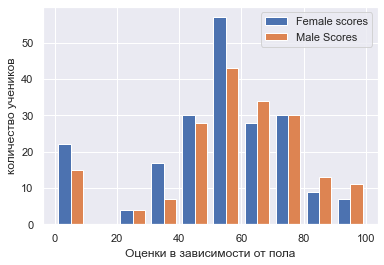

In [118]:
df_stud_f = df_stud[df_stud.sex == 'F']
df_stud_m = df_stud[df_stud.sex == 'M']
describe_stud_f = df_stud_f.describe()
describe_stud_m = df_stud_m.describe()
display(describe_stud_f)
display(describe_stud_m)

# проверим корреляцию между значениями столбцов для мальчиков и девочек. 
# Если корреляция маленькая, значит есть столбец, который сильно отличаются, в зависимости от пола
display(describe_stud_f.corrwith(describe_stud_m))

# Построим гистограмму
df = pd.DataFrame({'score_Female':df_stud_f.score,'score_Male':df_stud_m.score})
plt.hist([list(df.score_Female), list(df.score_Male)], label=['Female scores', 'Male Scores'])
plt.xlabel('Оценки в зависимости от пола')
plt.ylabel('количество учеников')
plt.legend(loc=1)
plt.show()

In [119]:
# делаем вывод, что от пола ничего не зависит.
# Удалим поле Sex
print('столбцов до - ', len(df_stud_new.columns))
df_stud_new = df_stud_new.drop(['sex'], axis=1)
print('столбцов после - ', len(df_stud_new.columns))

столбцов до -  29
столбцов после -  28


## 3. Возраст
- Заполнен полностью, 395==395
- Основная масса выборки - дети от 15-18 лет.

In [120]:
ser_age = df_stud.age.sort_values()
ser_age.value_counts(sort=False, dropna=False)

15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


<AxesSubplot:title={'center':'Распределение по возрастам'}>

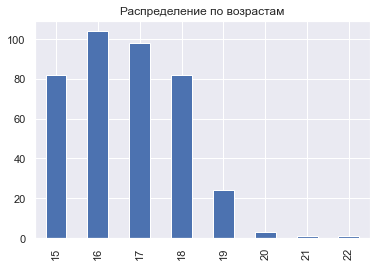

In [121]:
display(df_stud[df_stud.age>20])
df_stud.age.value_counts(sort=False, dropna=False).plot(kind='bar', title='Распределение по возрастам')

In [122]:
# Построим гистограмму зависимости средней оценки по возрасту от возраста
df=df_stud[['age','score']].groupby(by='age').mean()
display(df)

#средняя оценка у более молодых немного выше

,score
age,
15,56.280488
16,55.194175
17,51.377551
18,48.312500
19,40.238095
20,70.000000
21,35.000000
22,40.000000


## 5. Благосостояние: размер семьи, образование и профессия родителей, финансовая поддержка ребенка
- Заменили NaN на None,
- GT3 - greater 3; 
- LE3 - less or equal 3;
- построена гистограмма

In [123]:
df_stud.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

In [124]:
# для анализа успехов в учебе важна не только школа, но и семья. По данным, которые есть в базе можно предположить,
# что ученики с одинаковым адресом, родителями, кол-ом детей в семье, наличием интернета, могут быть из одной семьи.
# чтобы отметить это присвоим семьям порядковые номера.

df = df_stud.copy()

cols = ['address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','internet']
df_stud_rich = df_stud[cols].copy()

# посчитаем кол-во детей, у которых совпадают информация о родителях. семье, адресе.
studs_fam = (df_stud_rich.groupby(by=cols,as_index=False).size())
# display(studs_fam[studs_fam['size']>1])

# дадим каждой "семье" идентификатор
df_stud_with_fam = df.merge( df_stud_rich.drop_duplicates( cols ).reset_index(), on=cols )
# переименуем столбец и переместим его на первое место таблицы для удобства
inds = df_stud_with_fam['index']
df_stud_with_fam.drop(labels=['index'], axis=1, inplace=True)
df_stud_with_fam.insert(0,'fam_ind', inds)

display(df_stud_with_fam[df_stud_with_fam[cols].isna().any(axis=1)].sort_values(by='fam_ind').head(50))

# display(df_stud_with_fam[df_stud_with_fam.famsize == 'GT3'].sort_values(by='index').head(50))




,fam_ind,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,1,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
4,3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
8,6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
11,9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
13,11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
14,12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
22,15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
28,17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0


In [125]:
# Получим датасет с атрибутами, по которым будем искать семьи
print(cols)

# получим строки, в которых есть пустые ячейки
with_na = df_stud_rich[df_stud_rich.isna().any(axis=1)]
print(len(studs_fam))
print('Строки с пустыми ячейками: ', len(with_na), 'Остальные строки: ', studs_fam['size'].sum())
print('Сумма: ', len(with_na) + studs_fam['size'].sum(), '. Кол-во строк датасета:', len(df_stud_rich))

# исключим internet и повторим действия
cols = ['address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob']
print(cols)

# посчитаем кол-во детей, у которых совпадают информация о родителях. семье, адресе.
studs_fam2 = (df_stud_rich.groupby(by=cols,as_index=False).size())
# дадим каждой "семье без учета интернета" идентификатор
df_stud_with_fam2 = df.merge( df_stud_rich.drop_duplicates( cols ).reset_index(), on=cols )
# переименуем столбец и переместим его на первое место таблицы для удобства
inds = df_stud_with_fam2['index']
df_stud_with_fam.insert(1,'fam_ind_out_internet', inds)


# получим строки, в которых есть пустые ячейки
with_na = df_stud_rich[df_stud_rich[cols].isna().any(axis=1)]
print(len(studs_fam2))
print('Строки с пустыми ячейками: ', len(with_na), 'Остальные строки: ', studs_fam2['size'].sum())
print('Сумма: ', len(with_na) + studs_fam['size'].sum(), '. Кол-во строк датасета:', len(df_stud_rich))

df_compare = studs_fam.merge(studs_fam2, on=cols, how='outer')

df_compare[df_compare.size_y > df_compare.size_x]


['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'internet']
170
Строки с пустыми ячейками:  172 Остальные строки:  223
Сумма:  395 . Кол-во строк датасета: 395
['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob']
171
Строки с пустыми ячейками:  146 Остальные строки:  249
Сумма:  369 . Кол-во строк датасета: 395


,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,internet,size_x,size_y
3,R,GT3,T,1.0,1.0,at_home,other,no,1.0,2
4,R,GT3,T,1.0,1.0,at_home,other,yes,1.0,2
5,R,GT3,T,1.0,1.0,other,other,no,1.0,4
6,R,GT3,T,1.0,1.0,other,other,yes,3.0,4
9,R,GT3,T,2.0,1.0,at_home,services,no,1.0,2
10,R,GT3,T,2.0,1.0,at_home,services,yes,1.0,2
12,R,GT3,T,2.0,2.0,at_home,other,no,2.0,3
62,U,GT3,T,1.0,1.0,other,other,yes,3.0,4
68,U,GT3,T,2.0,1.0,other,other,no,1.0,4
69,U,GT3,T,2.0,1.0,other,other,yes,2.0,4


*объединение по семьи может принести пользу для наблюдений. Возможно вернемся к нему позже*

## 6. Совместное проживание родителей, опекунство

In [126]:
display(df_stud.Pstatus.describe())
display(df_stud.Pstatus.value_counts(dropna=False))

count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

<AxesSubplot:>

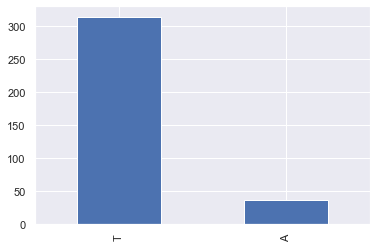

In [127]:
display(df_stud.Pstatus.value_counts(dropna=False))
df_stud.Pstatus.value_counts(sort=False).plot(kind='bar')


,score
Pstatus,
A,55.138889
T,51.704545


<AxesSubplot:ylabel='Frequency'>

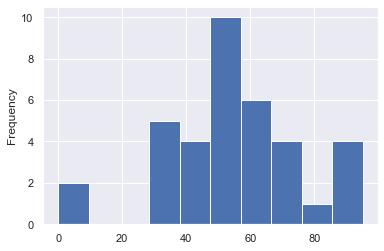

In [128]:
df=df_stud[['Pstatus','score']].groupby(by='Pstatus').mean()
display(df)

df_stud[df_stud.Pstatus=='A'].score.plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

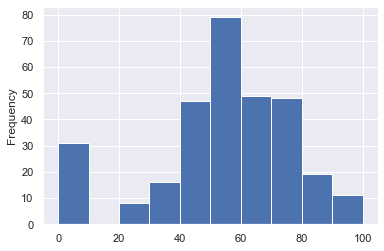

In [129]:
df_stud[df_stud.Pstatus=='T'].score.plot(kind='hist')

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

0      mother
1      father
2      mother
3      mother
4      father
        ...  
390       NaN
391    mother
392       NaN
393    mother
394    father
Name: guardian, Length: 395, dtype: object

<AxesSubplot:title={'center':'опекун'}>

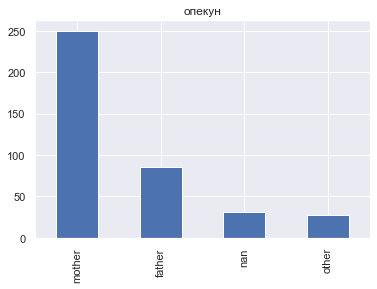

In [130]:
display(df_stud.guardian.describe())
display(df_stud.guardian.value_counts(dropna=False))

# Заменим Nan на None
df_stud_new.guardian = df_stud.guardian.apply(clean_obj_cell)

# Заменим None на Other
df_stud_new.guardian = df_stud.guardian.apply(lambda x: 'other' if x is None else x)
display(df_stud.guardian)

# Построим гистограмму
df_stud['guardian'].value_counts(dropna=False).plot(kind="bar", title='опекун')

In [131]:
# проверим зависимости между Pstatus и guardian
p_table = df_stud.pivot_table(index='Pstatus', values='score', columns='guardian', aggfunc='count', dropna=False)
display(p_table)
print('Живут раздельно. Отношение опекунов отцов к матерям', p_table.iloc[0,0]/p_table.iloc[0,1])
print('Живут вместе. Отношение опекунов отцов к матерям', p_table.iloc[1,0]/p_table.iloc[1,1])

# Влияние этих факторов на оценки
df_stud.pivot_table(index='Pstatus', values='score', columns='guardian', aggfunc='mean', dropna=False)

#Эти факторы мало влияют на оценки. Возможно они не важны вовсе

guardian,father,mother,other
Pstatus,,,
A,4,27,4
T,71,193,16


Живут раздельно. Отношение опекунов отцов к матерям 0.14814814814814814
Живут вместе. Отношение опекунов отцов к матерям 0.36787564766839376


guardian,father,mother,other
Pstatus,,,
A,40.000000,57.222222,58.7500
T,53.591549,51.606218,45.3125


## 7. Образование матери (Medu) и отца (Fedu)
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Числовые значения. Менять их на текст пока не будем, возможно, что так будет удобнее анализировать, сортировать
- Есть пустые ячейки
- Основная масса - образованы
- Есть родители без образования


Образование матери


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

Образование Отца


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

92    NaN
193   NaN
239   NaN
Name: Medu, dtype: float64

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

<AxesSubplot:title={'center':'Образование матери и отца'}>

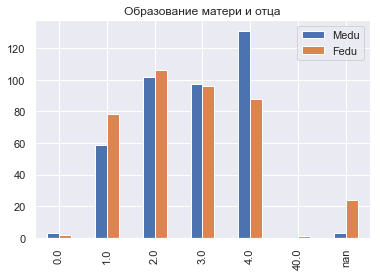

In [132]:
print('Образование матери')
display(df_stud.Medu.describe())
display(df_stud.Medu.value_counts(dropna=False))

print('Образование Отца')
display(df_stud.Fedu.describe())
display(df_stud.Fedu.value_counts(dropna=False))

# не будем менять Nan на None, так как Nan - можно привести к числу, а None - нельзя
display(df_stud[pd.isnull(df_stud.Medu)].Medu)

# В одном из значений Fedu есть исключительное значение 40, скорее всего  это ошибка, заменим его на 4
df_stud_new.Fedu = df_stud.Fedu.apply(lambda x: 4 if x == 40 else x)
display(df_stud.Fedu.value_counts(dropna=False))

# Построим гистограмму
df = pd.DataFrame({'Medu':df_stud.Medu.value_counts(dropna=False),'Fedu':df_stud.Fedu.value_counts(dropna=False)})
df[['Medu', 'Fedu']].plot(kind="bar", title='Образование матери и отца')

## 8. Профессия матери (Mjob) и отца (Fjob)
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)



In [133]:
print('Профессия матери')
display(df_stud.Mjob.describe())
display(df_stud.Mjob.value_counts(dropna=False))

print('Профессия Отца')
display(df_stud.Fjob.describe())
display(df_stud.Fjob.value_counts(dropna=False))

Профессия матери


count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

Профессия Отца


count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [134]:
# Заменим Nan на None
df_stud_new.Mjob = df_stud.Mjob.apply(clean_obj_cell)
df_stud_new.Fjob = df_stud.Fjob.apply(clean_obj_cell)

# Заменим None на Other
df_stud_new.Mjob = df_stud.Mjob.apply(lambda x: 'other' if x is None else x)
df_stud_new.Fjob = df_stud.Fjob.apply(lambda x: 'other' if x is None else x)

display(df_stud.Mjob)
display(df_stud.Fjob)

0       at_home
1       at_home
2       at_home
3        health
4         other
         ...   
390    services
391    services
392       other
393    services
394       other
Name: Mjob, Length: 395, dtype: object

0       teacher
1         other
2         other
3           NaN
4         other
         ...   
390    services
391    services
392       other
393       other
394     at_home
Name: Fjob, Length: 395, dtype: object

<AxesSubplot:title={'center':'Профессия матери и отца'}>

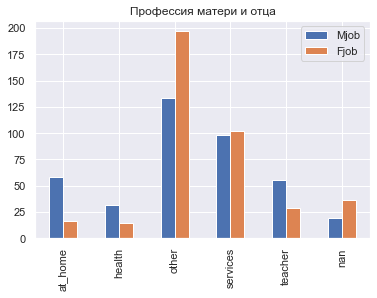

In [135]:
# Построим гистограмму
df = pd.DataFrame({'Mjob':df_stud.Mjob.value_counts(dropna=False),'Fjob':df_stud.Fjob.value_counts(dropna=False)})
df[['Mjob', 'Fjob']].plot(kind="bar", title='Профессия матери и отца')

In [136]:
df_stud.pivot_table(index=['Medu'], columns=['Fedu'], values='score', aggfunc='count')
# проследивается корреляция

Fedu,0.0,1.0,2.0,3.0,4.0,40.0
Medu,,,,,,
0.0,NaN,1.0,2.0,NaN,NaN,NaN
1.0,1.0,34.0,12.0,5.0,1.0,NaN
2.0,NaN,26.0,47.0,16.0,6.0,1.0
3.0,NaN,13.0,25.0,33.0,18.0,NaN
4.0,1.0,NaN,18.0,39.0,63.0,NaN


In [137]:
# ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
display(df_stud.pivot_table(index=['Medu'], columns=['Mjob'], values='score', aggfunc='count'))
display(df_stud.pivot_table(index=['Fedu'], columns=['Fjob'], values='score', aggfunc='count'))
# из таблиц видно, что учителем может работать только человек с высшим образованием и изредка со средним образованием,
# в медицине - человек с образованием выше 4 класса, но чаще с высшим
# мужчины почти не сидят дома и мало идут в медицину

Mjob,at_home,health,other,services,teacher
Medu,,,,,
0.0,2.0,NaN,1.0,NaN,NaN
1.0,25.0,1.0,23.0,5.0,NaN
2.0,21.0,2.0,43.0,30.0,NaN
3.0,8.0,5.0,36.0,38.0,3.0
4.0,2.0,24.0,22.0,24.0,52.0


Fjob,at_home,health,other,services,teacher
Fedu,,,,,
0.0,NaN,NaN,2.0,NaN,NaN
1.0,3.0,1.0,46.0,18.0,NaN
2.0,6.0,1.0,58.0,26.0,NaN
3.0,3.0,3.0,50.0,30.0,1.0
4.0,2.0,8.0,30.0,17.0,25.0
40.0,NaN,NaN,1.0,NaN,NaN


In [138]:
# если нет никаких данных о матери или отце и они не живут вместе, то отношения сильно плохие
display(df_stud[(df_stud.Fedu.isna()) & ((df_stud.Fjob.isna()) | (df_stud.Fjob == 'other')) & (df_stud.guardian != 'father')& (df_stud.Pstatus != 'T')])
display(df_stud[(df_stud.Medu.isna()) & ((df_stud.Mjob.isna())| (df_stud.Mjob == 'other')) & (df_stud.guardian != 'mother')& (df_stud.Pstatus != 'T')])

# у таких детей низкие оценки. Но их всего 4 человека, и 2 из них имеют 0 баллов, что может быть выбросом
# поэтому не будем учитывать данные выводы.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


## 9. Причина выбора школы 
('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

0      course
1      course
2       other
3        home
4        home
        ...  
390    course
391    course
392    course
393    course
394       NaN
Name: reason, Length: 395, dtype: object

<AxesSubplot:title={'center':'Причина выбора школы'}>

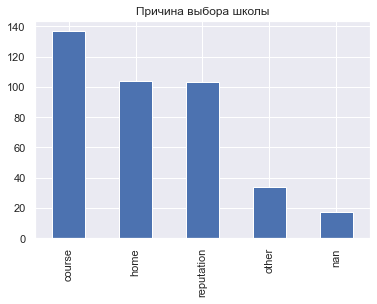

In [139]:
display(df_stud.reason.describe())
display(df_stud.reason.value_counts(dropna=False))

# Заменим Nan на None
df_stud_new.reason = df_stud.reason.apply(clean_obj_cell)

# Заменим None на Other
df_stud_new.reason = df_stud.reason.apply(lambda x: 'other' if x is None else x)

display(df_stud.reason)

# Построим гистограмму
df_stud['reason'].value_counts(dropna=False).plot(kind="bar", title='Причина выбора школы')

### Проверим зависимости категориальных данных и оценок

In [167]:
for col in ['school', 'sex', 'age','address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health']:
    get_boxplot(df_stud,col)
    
# df_stud.columns

TypeError: get_boxplot() takes 1 positional argument but 2 were given

In [141]:
     
for col in ['school', 'age', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health']:
    get_stat_dif(col)            

C:\Users\TANYA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\TANYA\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\TANYA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\TANYA\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\TANYA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\TANYA\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeW

Найдены статистически значимые различия для колонки Mjob


## 10. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)


## 11. (13. - 14.)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

время в пути до школы


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

время на учёбу помимо школы в неделю


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

26    NaN
30    NaN
35    NaN
37    NaN
59    NaN
68    NaN
70    NaN
104   NaN
112   NaN
132   NaN
Name: traveltime, dtype: float64

<AxesSubplot:title={'center':'Как проводит время'}>

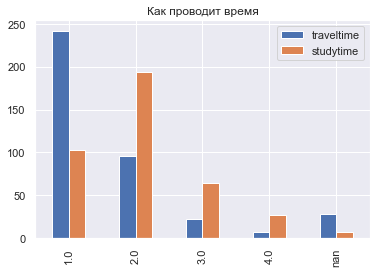

In [142]:
print('время в пути до школы')
display(df_stud.traveltime.describe())
display(df_stud.traveltime.value_counts(dropna=False))

print('время на учёбу помимо школы в неделю')
display(df_stud.studytime.describe())
display(df_stud.studytime.value_counts(dropna=False))

# не будем менять Nan на None, так как Nan - можно привести к числу, а None - нельзя
display(df_stud[pd.isnull(df_stud.traveltime)].traveltime.head(10))

# Построим гистограмму
df = pd.DataFrame({'traveltime':df_stud.traveltime.value_counts(dropna=False),'studytime':df_stud.studytime.value_counts(dropna=False)})
df[['traveltime', 'studytime']].plot(kind="bar", title='Как проводит время')

## failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [143]:
display(df_stud.failures.describe())
display(df_stud.failures.value_counts(dropna=False))

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

<AxesSubplot:title={'center':'количество внеучебных неудач'}>

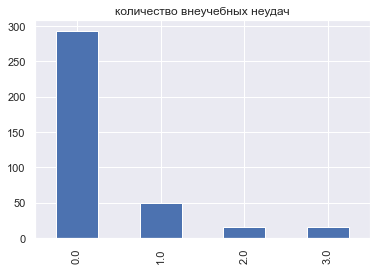

In [144]:
df_stud['failures'].value_counts(dropna=True).plot(kind="bar", title='количество внеучебных неудач')

## YES or NO. 
16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)


дополнительная образовательная поддержка (yes или no)


no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

семейная образовательная поддержка (yes или no)


yes    219
no     137
NaN     39
Name: famsup, dtype: int64

дополнительные платные занятия по математике (yes или no)


no     200
yes    155
NaN     40
Name: paid, dtype: int64

дополнительные внеучебные занятия (yes или no)


yes    195
no     186
NaN     14
Name: activities, dtype: int64

посещал детский сад (yes или no)


yes    300
no      79
NaN     16
Name: nursery, dtype: int64

хочет получить высшее образование (yes или no)


yes    356
NaN     20
no      19
Name: higher, dtype: int64

наличие интернета дома (yes или no)


yes    305
no      56
NaN     34
Name: internet, dtype: int64

в романтических отношениях (yes или no)


no     240
yes    124
NaN     31
Name: romantic, dtype: int64

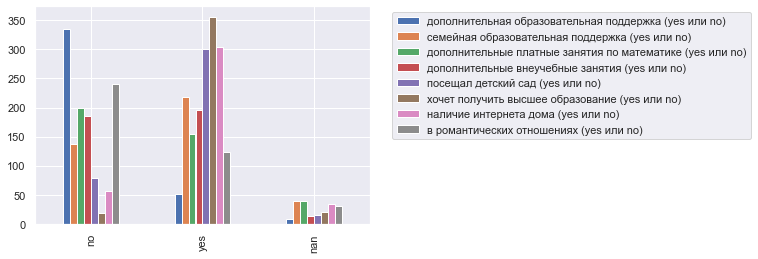

In [145]:
d_cols = {
    'schoolsup' : 'дополнительная образовательная поддержка (yes или no)',
    'famsup' : 'семейная образовательная поддержка (yes или no)',
    'paid' : 'дополнительные платные занятия по математике (yes или no)',
    'activities' : 'дополнительные внеучебные занятия (yes или no)',
    'nursery' : 'посещал детский сад (yes или no)',
    'higher' : 'хочет получить высшее образование (yes или no)',
    'internet' : 'наличие интернета дома (yes или no)',
    'romantic' : 'в романтических отношениях (yes или no)' 
}
def procced_yes_no(colname):
    print(d_cols[colname])
    display(df_stud[colname].value_counts(dropna=False))
    
    # Если значений больше двух, то обратить внимание!
    if df_stud[colname].nunique()>2:
        print('ALERT!')
    

d ={}
for colname in ['schoolsup','famsup','paid','activities','nursery', 'higher', 'internet','romantic']:
    procced_yes_no(colname)
    d[d_cols[colname]] = df_stud[colname].value_counts(dropna=False)
df2 = pd.DataFrame(d)
df2.plot(kind="bar", title='', mark_right=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


## Хорошо-плохо

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [146]:
# В одном из значений famrel есть исключительное значение -1, скорее всего  это ошибка, заменим его на 1
df_stud_new.famrel = df_stud.famrel.apply(lambda x: 1 if x == -1 else x)

семейные отношения


 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

ALERT!
свободное время после школы


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

проведение времени с друзьями


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

текущее состояние здоровья


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

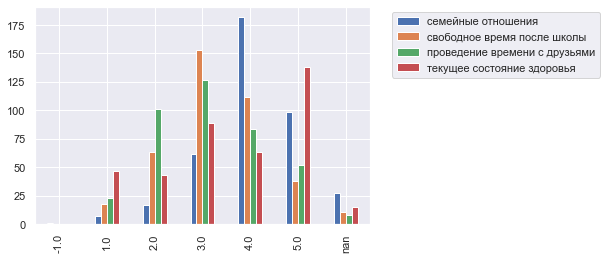

In [147]:
d_cols = {
    'famrel' : 'семейные отношения',
    'freetime' : 'свободное время после школы',
    'goout' : 'проведение времени с друзьями',
    'health' : 'текущее состояние здоровья'
}
def procced_good_no(colname):
    print(d_cols[colname])
    display(df_stud[colname].value_counts(dropna=False))
    
    # Если значений больше кол-ва классов, то обратить внимание!
    if df_stud[colname].nunique()>5:
        print('ALERT!')
    

d ={}
for colname in ['famrel','freetime','goout','health']:
    procced_good_no(colname)
    

# построим гистограмму для всех 4 признаков
for colname in ['famrel','freetime','goout','health']:
    d[d_cols[colname]] = df_stud[colname].value_counts(dropna=False)
df2 = pd.DataFrame(d)
df2.plot(kind="bar", title='', mark_right=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


## absences — количество пропущенных занятий
- скорее всего в день проходит по два занятия, так как четко видны всплески на четных числах
- 212 и 385 вполне возможные числа. Значит ученик пропустил 106 и 192дня. В учебном году примерно 34 недели  5 = 170 дней. Значит 212 - это не выброс, но 385 - выброс.
- Так как ученики с 212 и 3

0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
NaN       12
385.0      1
Name: absences, dtype: int64

<AxesSubplot:>

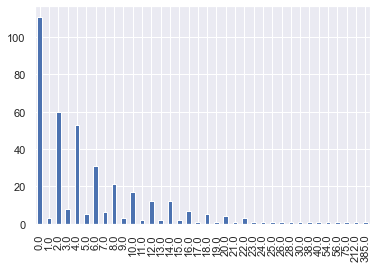

In [148]:
absences_sorted = df_stud.absences.sort_values()
display(absences_sorted.value_counts(sort=False, dropna=False))

absences_sorted.value_counts(sort=False).plot(kind='bar')

In [149]:
# установим 0 прогулов для выбросов и значений NaN
for ind in df_stud.index[(df_stud['absences'] > 200) | (pd.isnull(df_stud['absences']))].tolist():
    df_stud_new.at[ind, 'absences'] = 0
    display(df_stud_new.iloc[ind])


age                          15
address                       R
famsize                     GT3
Pstatus                       T
Medu                          2
Fedu                          4
Mjob                   services
Fjob                     health
reason                   course
guardian                 mother
traveltime                    1
studytime                     3
failures                      0
schoolsup                   yes
famsup                      yes
paid                        yes
activities                  yes
nursery                     yes
studytime, granular          -9
higher                      yes
internet                    yes
romantic                     no
famrel                        4
freetime                      3
goout                         2
health                        5
absences                      0
score                        40
Name: 24, dtype: object

age                          16
address                       U
famsize                     GT3
Pstatus                       T
Medu                          4
Fedu                          4
Mjob                   services
Fjob                    teacher
reason                    other
guardian                 father
traveltime                    1
studytime                     3
failures                      0
schoolsup                    no
famsup                      yes
paid                         no
activities                  yes
nursery                     yes
studytime, granular          -9
higher                      yes
internet                    yes
romantic                    yes
famrel                        4
freetime                      4
goout                         3
health                        4
absences                      0
score                        85
Name: 101, dtype: object

age                         15
address                      U
famsize                    GT3
Pstatus                      T
Medu                         1
Fedu                         2
Mjob                   at_home
Fjob                       NaN
reason                  course
guardian                mother
traveltime                   1
studytime                    2
failures                     0
schoolsup                   no
famsup                      no
paid                        no
activities                  no
nursery                     no
studytime, granular         -6
higher                     yes
internet                   yes
romantic                    no
famrel                       3
freetime                     2
goout                        3
health                       1
absences                     0
score                       75
Name: 120, dtype: object

age                         16
address                      R
famsize                    NaN
Pstatus                      T
Medu                         4
Fedu                         4
Mjob                   teacher
Fjob                   teacher
reason                  course
guardian                mother
traveltime                   1
studytime                  NaN
failures                     0
schoolsup                   no
famsup                      no
paid                       yes
activities                 yes
nursery                    yes
studytime, granular        NaN
higher                     yes
internet                   yes
romantic                    no
famrel                       3
freetime                     5
goout                        5
health                       4
absences                     0
score                       90
Name: 129, dtype: object

age                        18
address                     U
famsize                   LE3
Pstatus                     T
Medu                        1
Fedu                        1
Mjob                    other
Fjob                    other
reason                 course
guardian               mother
traveltime                  1
studytime                   1
failures                    3
schoolsup                  no
famsup                     no
paid                       no
activities                 no
nursery                   yes
studytime, granular        -3
higher                     no
internet                  yes
romantic                  yes
famrel                      2
freetime                    3
goout                       5
health                      4
absences                    0
score                       0
Name: 150, dtype: object

age                            17
address                         U
famsize                       NaN
Pstatus                         T
Medu                            4
Fedu                            4
Mjob                      teacher
Fjob                        other
reason                 reputation
guardian                   mother
traveltime                      1
studytime                       2
failures                        0
schoolsup                      no
famsup                        yes
paid                          yes
activities                    yes
nursery                       yes
studytime, granular            -6
higher                        yes
internet                      yes
romantic                       no
famrel                          4
freetime                        4
goout                           4
health                          5
absences                        0
score                          50
Name: 172, dtype: object

age                            17
address                         U
famsize                       LE3
Pstatus                         T
Medu                            3
Fedu                            2
Mjob                        other
Fjob                        other
reason                 reputation
guardian                   mother
traveltime                      2
studytime                       2
failures                        0
schoolsup                      no
famsup                         no
paid                          NaN
activities                     no
nursery                       yes
studytime, granular            -6
higher                        yes
internet                      NaN
romantic                       no
famrel                          4
freetime                        4
goout                           4
health                          1
absences                        0
score                          75
Name: 215, dtype: object

age                          16
address                       U
famsize                     GT3
Pstatus                       T
Medu                          2
Fedu                          3
Mjob                   services
Fjob                    teacher
reason                    other
guardian                 mother
traveltime                    1
studytime                     2
failures                      0
schoolsup                   yes
famsup                      NaN
paid                         no
activities                   no
nursery                     yes
studytime, granular          -6
higher                      yes
internet                    yes
romantic                     no
famrel                        2
freetime                      3
goout                         1
health                        3
absences                      0
score                        85
Name: 222, dtype: object

age                            17
address                         U
famsize                       LE3
Pstatus                       NaN
Medu                            2
Fedu                            3
Mjob                     services
Fjob                     services
reason                 reputation
guardian                   father
traveltime                      1
studytime                     NaN
failures                        0
schoolsup                      no
famsup                        yes
paid                          yes
activities                     no
nursery                        no
studytime, granular           NaN
higher                        NaN
internet                      yes
romantic                       no
famrel                          5
freetime                        3
goout                           3
health                          3
absences                        0
score                          60
Name: 227, dtype: object

age                        17
address                   NaN
famsize                   NaN
Pstatus                     T
Medu                        2
Fedu                        1
Mjob                    other
Fjob                    other
reason                 course
guardian               mother
traveltime                  1
studytime                   1
failures                    0
schoolsup                  no
famsup                     no
paid                       no
activities                 no
nursery                    no
studytime, granular        -3
higher                    yes
internet                  yes
romantic                   no
famrel                      4
freetime                    4
goout                       2
health                      5
absences                    0
score                      60
Name: 254, dtype: object

age                            18
address                         R
famsize                       LE3
Pstatus                       NaN
Medu                            3
Fedu                            4
Mjob                          NaN
Fjob                        other
reason                 reputation
guardian                   mother
traveltime                      2
studytime                       2
failures                        0
schoolsup                      no
famsup                        yes
paid                          yes
activities                    yes
nursery                       yes
studytime, granular            -6
higher                        yes
internet                      yes
romantic                       no
famrel                          4
freetime                        2
goout                           5
health                          1
absences                        0
score                          85
Name: 265, dtype: object

age                          19
address                     NaN
famsize                     GT3
Pstatus                       T
Medu                          3
Fedu                          3
Mjob                      other
Fjob                   services
reason                     home
guardian                  other
traveltime                    1
studytime                     2
failures                      2
schoolsup                    no
famsup                      yes
paid                        yes
activities                  yes
nursery                     yes
studytime, granular          -6
higher                      yes
internet                    yes
romantic                     no
famrel                        4
freetime                      3
goout                         5
health                        5
absences                      0
score                       NaN
Name: 270, dtype: object

age                          18
address                       U
famsize                     LE3
Pstatus                       T
Medu                          1
Fedu                          3
Mjob                    at_home
Fjob                   services
reason                   course
guardian                 mother
traveltime                    1
studytime                     1
failures                      1
schoolsup                    no
famsup                       no
paid                         no
activities                   no
nursery                     yes
studytime, granular          -3
higher                       no
internet                    yes
romantic                    yes
famrel                        4
freetime                      3
goout                         3
health                        3
absences                      0
score                        40
Name: 352, dtype: object

age                          20
address                       U
famsize                     LE3
Pstatus                       A
Medu                          2
Fedu                          2
Mjob                   services
Fjob                   services
reason                   course
guardian                    NaN
traveltime                    1
studytime                     2
failures                      2
schoolsup                    no
famsup                      yes
paid                        yes
activities                   no
nursery                     yes
studytime, granular          -6
higher                      yes
internet                     no
romantic                     no
famrel                        5
freetime                      5
goout                         4
health                        4
absences                      0
score                        45
Name: 390, dtype: object

# score — баллы по госэкзамену по математике

0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64

<AxesSubplot:>

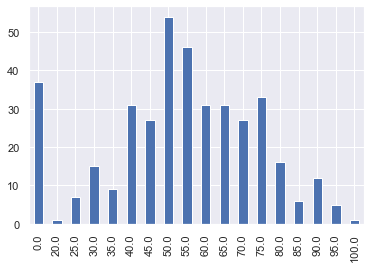

In [150]:
score_sorted = df_stud.score.sort_values()
display(score_sorted.value_counts(sort=False))

score_sorted.value_counts(sort=False).plot(kind='bar')

In [152]:
# найдем связи между данными у студентов с баллом 0 за экзамен
df_zero_score = df_stud.copy()
df_zero_score = df_zero_score[df_zero_score.score==0]
display(df_zero_score)
# sns.pairplot(df_zero_score, kind='reg')
df_zero_score.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.277001,-0.308023,-0.173553,-0.043985,-0.062840,0.043985,-0.013915,0.189722,0.090751,-0.224359,NaN,NaN
Medu,-0.277001,1.000000,0.763420,-0.139369,0.138471,-0.314499,-0.138471,-0.053375,0.178854,0.024078,-0.104942,NaN,NaN
Fedu,-0.308023,0.763420,1.000000,0.013349,0.243154,-0.257808,-0.243154,-0.038095,0.108777,0.126071,0.040732,NaN,NaN
traveltime,-0.173553,-0.139369,0.013349,1.000000,-0.141737,-0.247421,0.141737,-0.061199,-0.067848,0.046303,-0.144564,NaN,NaN
studytime,-0.043985,0.138471,0.243154,-0.141737,1.000000,-0.345101,-1.000000,-0.099838,-0.102243,-0.223221,-0.000755,NaN,NaN
failures,-0.062840,-0.314499,-0.257808,-0.247421,-0.345101,1.000000,0.345101,-0.136602,0.004118,0.031227,0.199496,NaN,NaN
"studytime, granular",0.043985,-0.138471,-0.243154,0.141737,-1.000000,0.345101,1.000000,0.099838,0.102243,0.223221,0.000755,NaN,NaN
famrel,-0.013915,-0.053375,-0.038095,-0.061199,-0.099838,-0.136602,0.099838,1.000000,0.279762,0.271268,-0.068486,NaN,NaN
freetime,0.189722,0.178854,0.108777,-0.067848,-0.102243,0.004118,0.102243,0.279762,1.000000,0.319699,-0.017763,NaN,NaN
goout,0.090751,0.024078,0.126071,0.046303,-0.223221,0.031227,0.223221,0.271268,0.319699,1.000000,-0.093742,NaN,NaN


### корреляции нет, скорее всего score=0 - это ошибка, пустые значения. Их немного и они ничего нам не дают, поэтому удалим эти данные

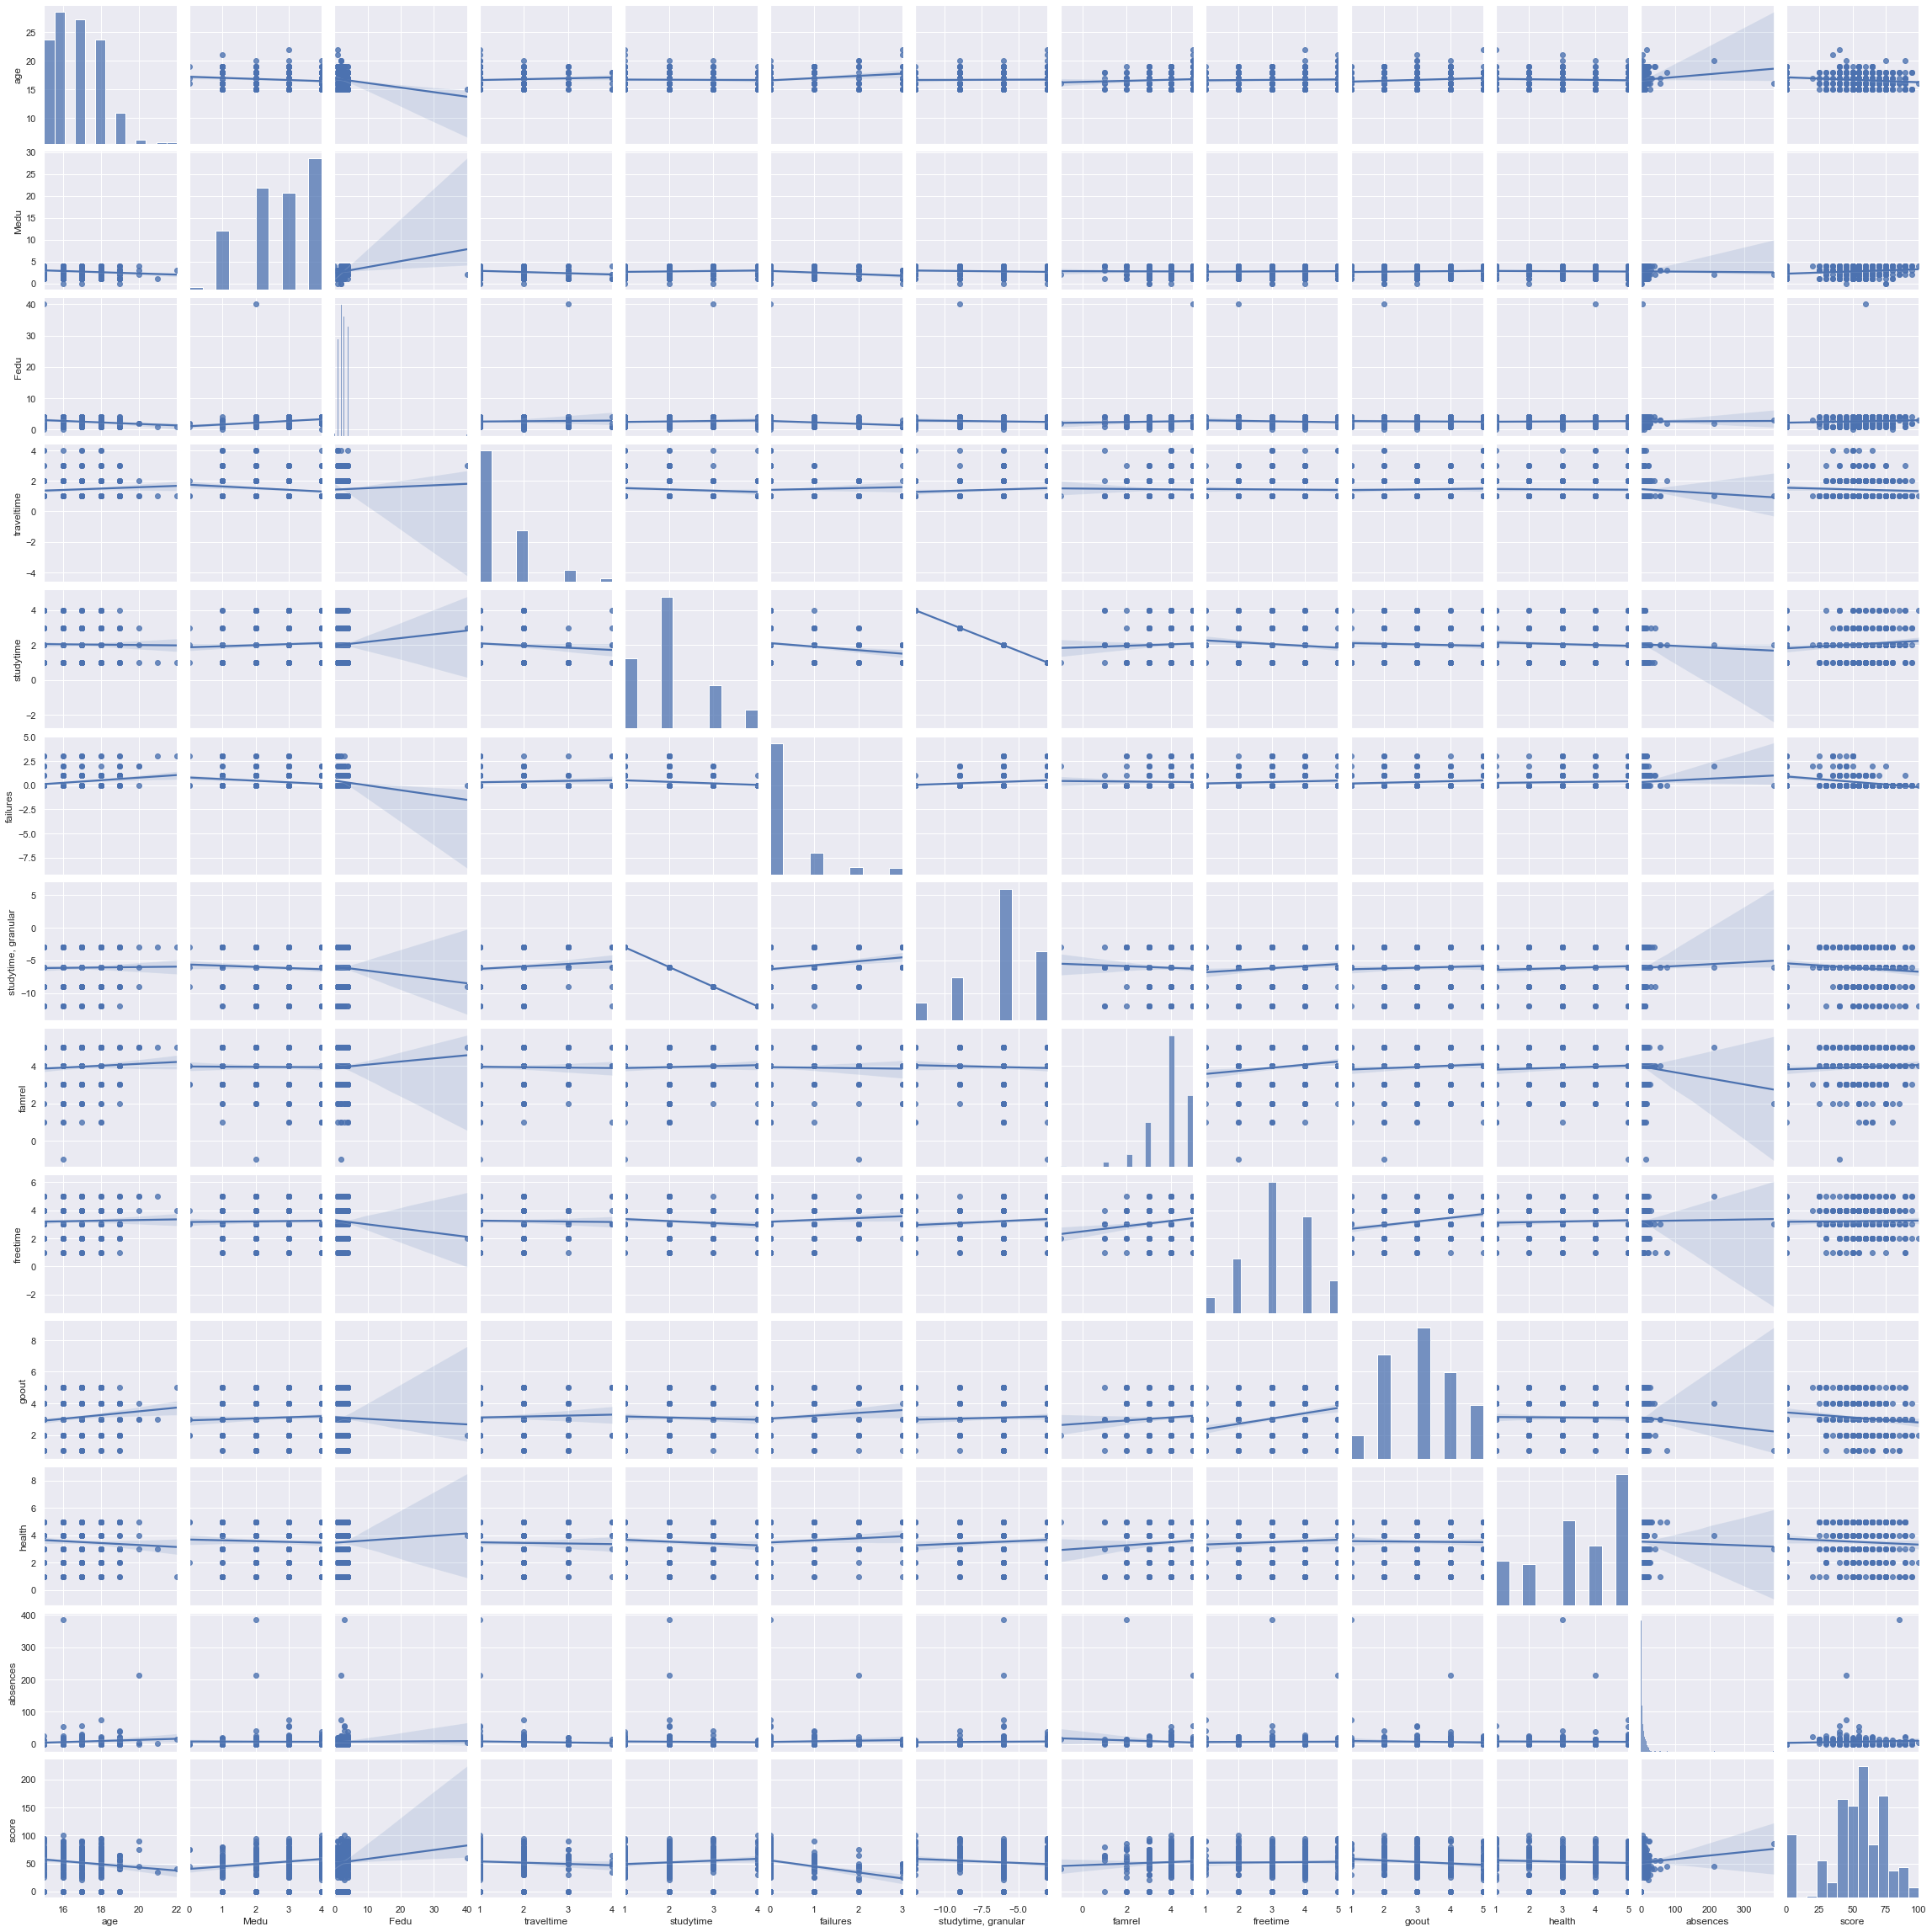

In [43]:
sns.pairplot(df_stud, kind='reg')

In [46]:
corr_studs = df_stud_new.corr()
corr_studs

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.067415,0.029023,0.135107,-0.065946,0.154023,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014459,0.025335,0.064164,-0.045051,0.102196,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.026122,-0.025892,0.042663,0.023862,0.030989,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021542,-0.021937,0.037636,-0.021531,-0.002035,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.039555,-0.121969,-0.051280,-0.080016,-0.063386,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009110,0.098382,0.120914,0.081284,0.058181,-0.344338
"studytime, granular",0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.039555,0.121969,0.051280,0.080016,0.063386,-0.115741
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,-0.039555,1.000000,0.172751,0.077167,0.086309,-0.042410,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.172751,1.000000,0.296437,0.061575,-0.073923,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.077167,0.296437,1.000000,-0.015608,0.026410,-0.129685


<AxesSubplot:>

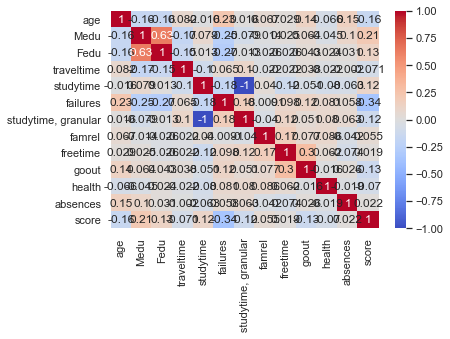

In [47]:
sns.heatmap(corr_studs,annot=True, cmap='coolwarm')

четко видно, что между studytime, granular  и  studytime  полная обратная зависимость. Поэтому один из этих параметров - лишний.
Удалим studytime, granular 

In [153]:
print('столбцов до - ', len(df_stud_new.columns))
df_stud_new = df_stud_new.drop(['studytime, granular'], axis=1)
print('столбцов после - ', len(df_stud_new.columns))

столбцов до -  28
столбцов после -  27


замечена хорошая корреляция между образованием отца Fedu и матери Medu, и между freetime и goout

# Поиск закономерностей, заполнение пустых ячеек, удаление лишних данных

In [154]:
df_stud_ms[['address','famsize','Pstatus','reason', 'guardian', 'traveltime', 'nursery', 'internet', 'health', 'absences', 'score']]

,address,famsize,Pstatus,reason,guardian,traveltime,nursery,internet,health,absences,score
349,R,GT3,T,course,NaN,2.0,no,yes,5.0,10.0,65.0
350,NaN,GT3,T,home,other,3.0,NaN,yes,2.0,8.0,NaN
351,U,GT3,T,course,mother,2.0,yes,yes,3.0,2.0,65.0
352,U,LE3,T,course,mother,1.0,yes,yes,3.0,NaN,40.0
353,R,GT3,T,home,other,3.0,yes,yes,5.0,4.0,40.0
354,NaN,GT3,T,home,mother,2.0,no,yes,2.0,4.0,55.0
355,U,GT3,T,course,father,1.0,yes,no,5.0,0.0,45.0
356,R,GT3,T,other,father,2.0,yes,yes,5.0,4.0,65.0
357,U,LE3,NaN,reputation,mother,2.0,yes,no,5.0,2.0,55.0
358,U,LE3,T,home,father,2.0,no,yes,3.0,4.0,50.0


In [155]:
# Предположим, что обе школы городские, тогда из R добираться дольше

# странно, но при выборе школы, по расстоянию от дома,  школьник очень долго добирается. 
# Дольше, чем те, кто не ставил в приоритет расположение. Возможно, что у него нет транспорта и он идет пешком, либо это ошибка данных

df_stud_ms[(df_stud_ms.address == 'R') & (df_stud_ms.reason == 'home') ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
353,MS,M,19,R,GT3,T,1.0,1.0,other,other,home,other,3.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,5.0,4.0,40.0
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,home,mother,4.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
384,MS,M,18,R,GT3,T,4.0,2.0,other,NaN,home,father,NaN,1.0,1.0,no,no,NaN,no,yes,-3.0,yes,NaN,no,5.0,4.0,3.0,3.0,14.0,25.0


In [156]:
df_stud_gp[(df_stud_gp.address == 'R') & (df_stud_gp.reason == 'home') ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,4.0,1.0,yes,yes,yes,yes,yes,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
197,GP,M,16,R,LE3,NaN,3.0,3.0,teacher,other,home,father,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,no,3.0,3.0,4.0,3.0,8.0,50.0
273,GP,M,17,R,GT3,T,1.0,2.0,at_home,at_home,home,mother,1.0,2.0,0.0,no,yes,yes,yes,no,-6.0,yes,NaN,yes,3.0,5.0,2.0,1.0,2.0,70.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
336,GP,F,19,R,GT3,A,3.0,1.0,services,NaN,home,other,1.0,3.0,1.0,no,no,yes,no,NaN,-9.0,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0
339,GP,F,17,R,GT3,A,3.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,2.0,4.0,50.0


Процент выбора школы GP по близость к дому: 0.2693409742120344
Процент выбора школы MS по близость к дому: 0.21739130434782608
Процент выбора школы GP по репутации: 0.2808022922636103
Процент выбора школы MS по репутации: 0.10869565217391304
Процент выбора школы GP по программе: 0.34097421203438394
Процент выбора школы MS по программе: 0.391304347826087
Процент выбора школы GP по другое: 0.07163323782234957
Процент выбора школы MS по другое: 0.21739130434782608


<ipython-input-157-eb8a03f42cfc>:31: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1[0].pie(sizes, explode=(0,0,0,0), labels=labels, autopct='%1.1f%%',
<ipython-input-157-eb8a03f42cfc>:35: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1[1].pie(sizes2, labels=labels, autopct='%1.1f%%',


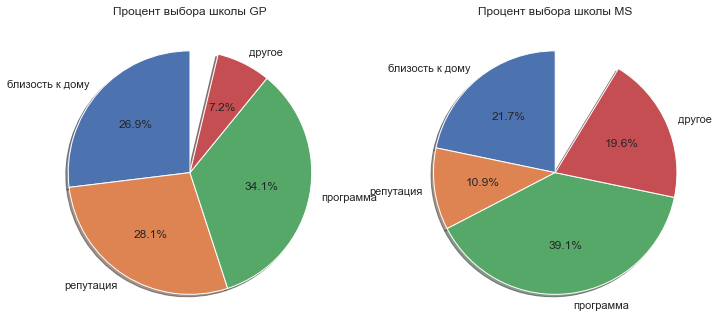

In [157]:
# ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
df_stud_gp = df_stud[df_stud.school=='GP']
df_stud_ms = df_stud[df_stud.school=='MS']
gp_h = len(df_stud_gp[df_stud_gp.reason == 'home'])/len(df_stud_gp)
ms_h = len(df_stud_ms[df_stud_ms.reason == 'home'])/len(df_stud_ms)
gp_r = len(df_stud_gp[df_stud_gp.reason == 'reputation'])/len(df_stud_gp)
ms_r = len(df_stud_ms[df_stud_ms.reason == 'reputation'])/len(df_stud_ms)
gp_c = len(df_stud_gp[df_stud_gp.reason == 'course'])/len(df_stud_gp)
ms_c = len(df_stud_ms[df_stud_ms.reason == 'course'])/len(df_stud_ms)
gp_o = len(df_stud_gp[df_stud_gp.reason == 'other'])/len(df_stud_gp)
ms_o = len(df_stud_ms[df_stud_ms.reason == 'other'])/len(df_stud_ms)


print('Процент выбора школы GP по близость к дому:', gp_h)
print('Процент выбора школы MS по близость к дому:', ms_h)

print('Процент выбора школы GP по репутации:', gp_r)
print('Процент выбора школы MS по репутации:', ms_r)

print('Процент выбора школы GP по программе:', gp_c)
print('Процент выбора школы MS по программе:', ms_c)

print('Процент выбора школы GP по другое:', gp_o)
print('Процент выбора школы MS по другое:', ms_h)

labels = 'близость к дому', 'репутация', 'программа', 'другое'
sizes = [gp_h, gp_r, gp_c, gp_o]
sizes2 = [ms_h, ms_r, ms_c, ms_o]

fig1, ax1 = plt.subplots(1,2, figsize=(12,12))
ax1[0].pie(sizes, explode=(0,0,0,0), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].set_title('Процент выбора школы GP')

ax1[1].pie(sizes2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[1].set_title('Процент выбора школы MS')

plt.show()

In [158]:
# Удалим строки score == 0, так как это похоже на выбросы.

print('строк до - ', len(df_stud_new))
df_stud_new = df_stud_new.drop(df_stud_new[df_stud_new.score == 0].index)
print('строк после - ', len(df_stud_new))



строк до -  395
строк после -  358


In [163]:
df_stud_new[df_stud_new.higher=='no']

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
78,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
127,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
163,17,U,GT3,T,1.0,3.0,at_home,services,course,father,1.0,1.0,0.0,no,no,no,NaN,yes,no,yes,no,5.0,3.0,3.0,2.0,2.0,50.0
164,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
165,16,U,GT3,T,3.0,2.0,services,services,course,mother,2.0,1.0,1.0,no,yes,no,yes,no,no,no,no,4.0,5.0,2.0,2.0,16.0,60.0
166,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
247,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
252,18,U,NaN,NaN,2.0,1.0,services,services,other,mother,1.0,1.0,1.0,no,no,no,no,no,no,yes,no,3.0,2.0,5.0,5.0,4.0,40.0
276,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
311,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0


In [166]:
for col in [ 'age','address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health']:
    get_boxplot(df_stud_new,col)
    
df_stud_new

TypeError: get_boxplot() takes 1 positional argument but 2 were given